**Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

*This notebook contains all the sample code and solutions to the exercices in chapter 2.*

In [23]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/garridolecca/AsthmaGIS/master/"
PATH = os.path.join("datasets", "csv")
URL = DOWNLOAD_ROOT + "datasets/csv/housing.tgz"

def fetch_data(url=URL, path=PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    tgz_path = os.path.join(path, "Asthma.tar")
    urllib.request.urlretrieve(url, tgz_path)
    tgz = tarfile.open(tgz_path)
    tgz.extractall(path=path)
    tgz.close()

In [6]:
fetch_data()

In [11]:
import pandas as pd

def load_data(path=PATH):
    csv_path = os.path.join(path, "Asthma.csv")
    return pd.read_csv(csv_path)

In [12]:
asthma = load_data()
asthma.head()

,OBJECTID,Ozone Pctl,PM 2.5 Pctl,Diesel PM Pctl,DrinkingWater Pctl,Pesticides Pctl,Tox Releases Pctl,GroundWater Threats Pctl,Asthma,Asthma Pctl,...,Education Pctl,Poverty Pctl,Children < 10 (%),Elderly > 65 (%),Hispanic (%),White (%),Asian American (%),Other (%),Shape_Length,Shape_Area
0,1,82,53,89,62.0,19,42,0,22.63,12,...,19.0,15.0,14.9,12.4,10.7,40.2,41.5,3.5,13460.218170,8.807436e+06
1,2,82,53,80,70.0,26,44,0,46.83,52,...,19.0,15.0,8.9,21.0,20.5,60.4,12.3,3.2,7917.036802,3.330251e+06
2,3,82,43,28,70.0,0,38,0,33.43,31,...,19.0,21.0,8.5,18.9,12.3,69.4,12.3,3.1,14017.221850,1.070086e+07
3,4,82,53,28,70.0,0,45,0,46.83,52,...,23.0,15.0,9.7,15.3,23.2,51.1,17.7,2.8,5250.161446,1.461149e+06
4,5,82,53,23,70.0,0,46,22,46.83,52,...,24.0,28.0,10.6,13.7,24.0,47.3,20.7,3.4,6222.394919,1.910701e+06


In [14]:
asthma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 21 columns):
OBJECTID                    561 non-null int64
Ozone Pctl                  561 non-null int64
PM 2.5 Pctl                 561 non-null int64
Diesel PM Pctl              561 non-null int64
DrinkingWater Pctl          558 non-null float64
Pesticides Pctl             561 non-null int64
Tox Releases Pctl           561 non-null int64
GroundWater Threats Pctl    561 non-null int64
Asthma                      561 non-null float64
Asthma Pctl                 561 non-null int64
Cardiovascular Pctl         561 non-null int64
Education Pctl              546 non-null float64
Poverty Pctl                550 non-null float64
Children < 10 (%)           561 non-null float64
Elderly > 65 (%)            561 non-null float64
Hispanic (%)                558 non-null float64
White (%)                   558 non-null float64
Asian American (%)          558 non-null float64
Other (%)                   558

All the fields are numeric, some are integer and other are double 
Poverty percentil have null values
Hispanic , asian and other have null values
We need to fill the data

In [15]:
asthma.describe()

,OBJECTID,Ozone Pctl,PM 2.5 Pctl,Diesel PM Pctl,DrinkingWater Pctl,Pesticides Pctl,Tox Releases Pctl,GroundWater Threats Pctl,Asthma,Asthma Pctl,...,Education Pctl,Poverty Pctl,Children < 10 (%),Elderly > 65 (%),Hispanic (%),White (%),Asian American (%),Other (%),Shape_Length,Shape_Area
count,561.000000,561.000000,561.000000,561.000000,558.000000,561.000000,561.000000,561.000000,561.000000,561.000000,...,546.000000,550.000000,561.000000,561.000000,558.000000,558.000000,558.000000,558.000000,561.000000,5.610000e+02
mean,281.000000,79.481283,62.556150,54.540107,70.768817,4.875223,51.916221,28.450980,46.189002,47.106952,...,49.001832,46.105455,11.974510,11.469697,37.924373,44.996057,10.589785,2.768638,11133.815112,1.191126e+07
std,162.091024,7.789422,15.981489,24.144629,13.089608,14.832473,15.470771,30.041546,20.953935,26.770105,...,28.982595,28.176774,3.648289,5.169168,27.197944,25.220738,7.413319,1.592127,18502.683337,6.427806e+07
min,1.000000,53.000000,4.000000,1.000000,14.000000,0.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.600000,0.900000,0.000000,0.000000,1715.569125,1.799447e+05
25%,141.000000,74.000000,53.000000,36.000000,70.000000,0.000000,48.000000,0.000000,31.120000,27.000000,...,23.000000,21.000000,9.700000,7.700000,14.525000,23.125000,5.700000,1.900000,4865.619919,1.140525e+06
50%,281.000000,78.000000,66.000000,59.000000,70.000000,0.000000,55.000000,22.000000,43.410000,47.000000,...,48.000000,45.000000,11.400000,10.900000,28.400000,50.500000,8.700000,2.800000,6537.957411,1.910701e+06
75%,421.000000,82.000000,82.000000,75.000000,72.000000,0.000000,62.000000,52.000000,62.290000,72.000000,...,75.000000,70.000000,14.200000,14.900000,59.925000,65.925000,14.175000,3.500000,10078.241230,3.824715e+06
max,561.000000,100.000000,93.000000,94.000000,97.000000,82.000000,78.000000,99.000000,98.740000,93.000000,...,100.000000,100.000000,26.200000,33.700000,97.300000,89.400000,56.100000,25.000000,210335.290500,9.297952e+08


In [16]:
%matplotlib inline

In [17]:
import matplotlib as ptl

Saving figure histograms


AttributeError: module 'matplotlib' has no attribute 'show'

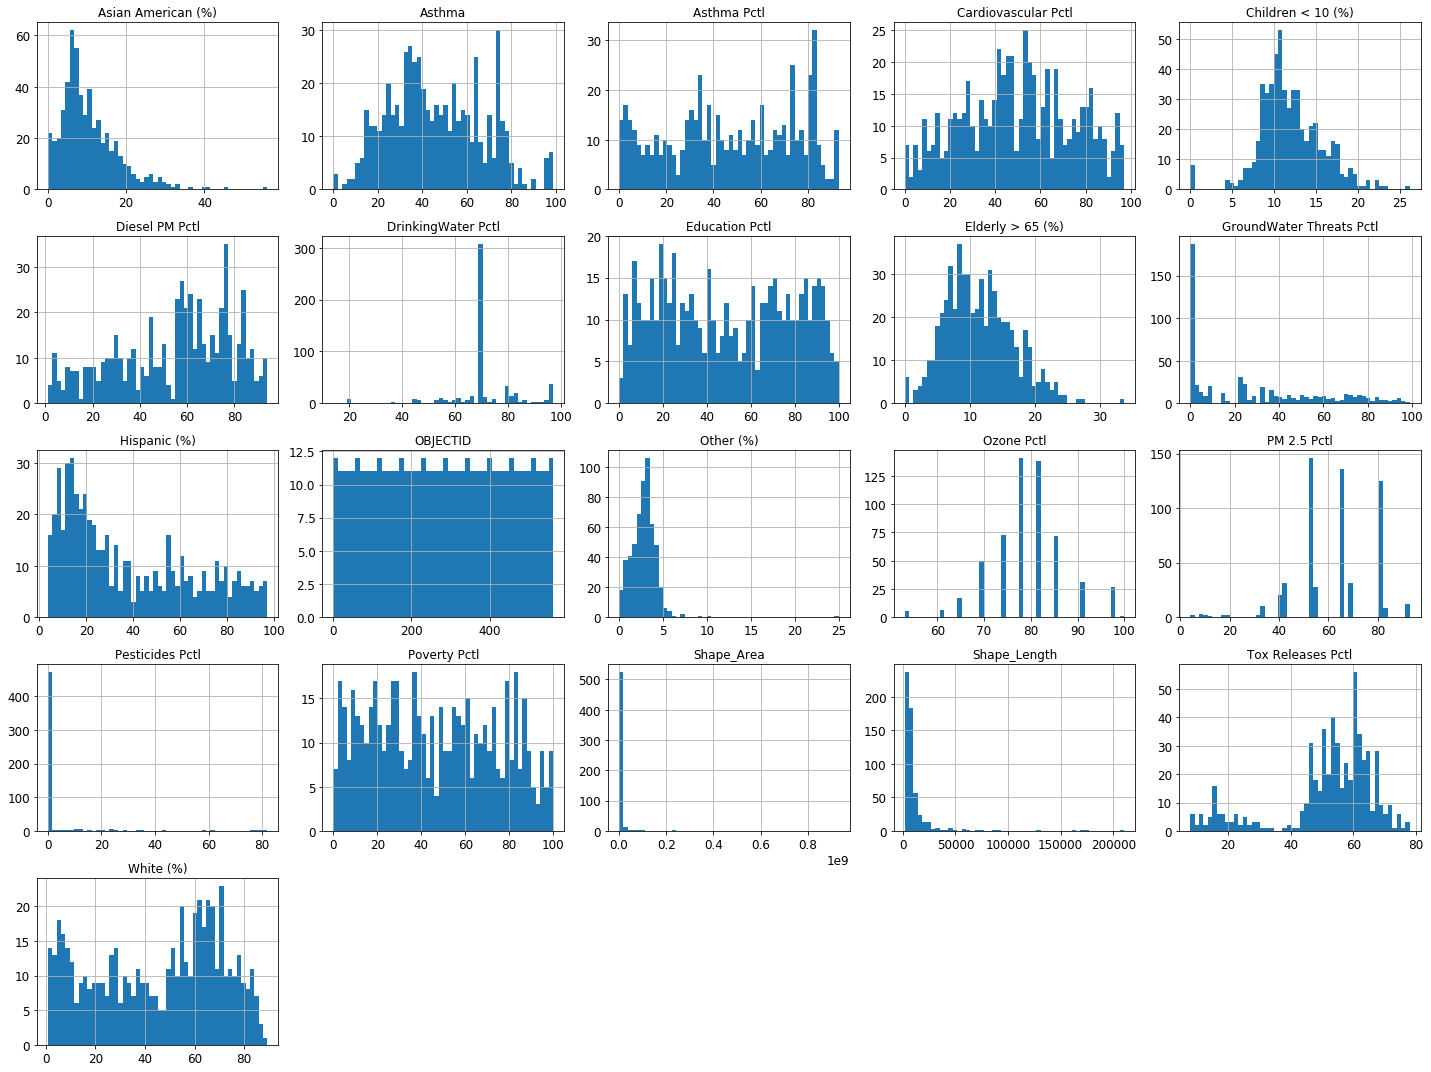

In [24]:
asthma.hist(bins = 50, figsize=(20,15))
save_fig('histograms')
ptl.show()